In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import uproot
import pandas as pd
import awkward as ak 
plt.rcParams['figure.dpi'] = 140

In [2]:
file = uproot.open("output_1-2.root")

In [3]:
hwQual = file["Events"]["L1Jet_hwQual"].array()
jet_pt = file["Events"]["L1Jet_pt"].array()
jet_phi = file["Events"]["L1Jet_phi"].array()
jet_eta = file["Events"]["L1Jet_eta"].array()

In [4]:
jet_indices = []
pts = []
etas = []
phis = []
for j in range(len(hwQual)):
    i = hwQual[j]
    #print(i)
    if np.sum(i) != 0:
        index = np.argwhere(i==1)
        jet_indices += [index]
        pts += [jet_pt[j][index]]
        etas += [jet_eta[j][index]]
        phis += [jet_phi[j][index]]
        

jet_indices = ak.flatten(ak.flatten(jet_indices))
pts = ak.flatten(ak.flatten(pts))
phis = ak.flatten(ak.flatten(phis))
etas = ak.flatten(ak.flatten(etas))
jet_pt = ak.flatten(jet_pt)
jet_phi = ak.flatten(jet_phi)
jet_eta = ak.flatten(jet_eta)

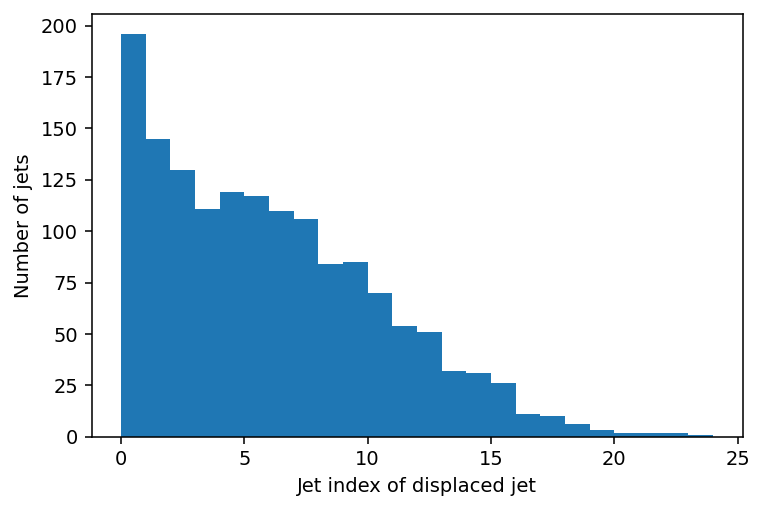

In [5]:
plt.hist(jet_indices,bins=24)
plt.xlabel("Jet index of displaced jet")
plt.ylabel("Number of jets")
plt.savefig("n_displaced_jets.png")

Text(0, 0.5, 'A.U.')

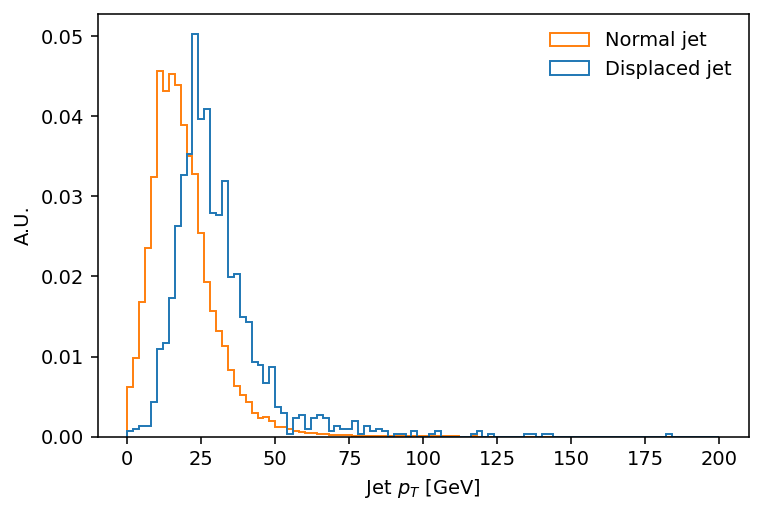

In [6]:
plt.hist([pts,jet_pt],bins=100,density=True,histtype="step", range=[0,200],label=["Displaced jet","Normal jet"])
plt.legend(frameon=False)
plt.xlabel(r"Jet $p_T$ [GeV]")
plt.ylabel("A.U.")

In [9]:
min(jet_pt)

0.5

Text(0, 0.5, 'A.U.')

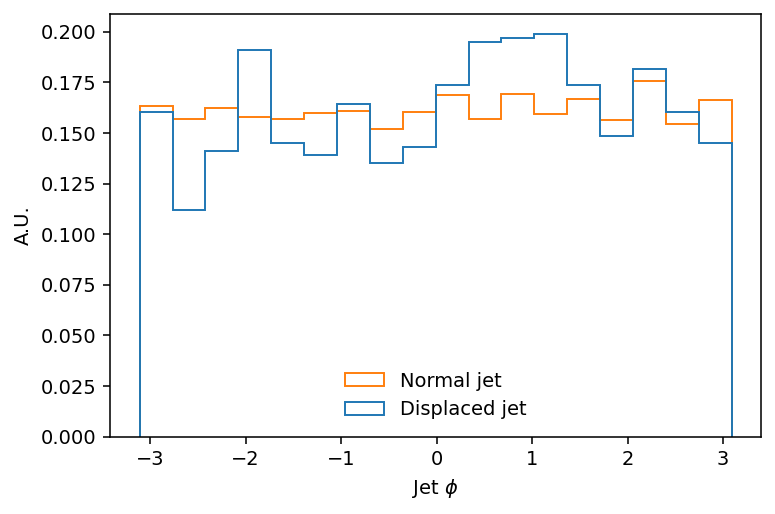

In [7]:
plt.hist([phis,jet_phi],bins=18,density=True,histtype="step", label=["Displaced jet","Normal jet"])
plt.legend(frameon=False,loc='lower center')
plt.xlabel(r"Jet $\phi$ ")
plt.ylabel("A.U.")

Text(0, 0.5, 'A.U.')

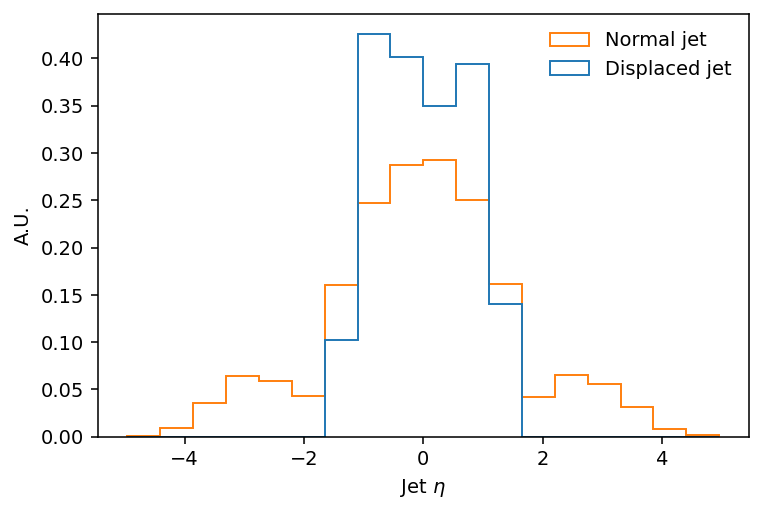

In [8]:
plt.hist([etas,jet_eta],bins=18,density=True,histtype="step", label=["Displaced jet","Normal jet"])
plt.legend(frameon=False)
plt.xlabel(r"Jet $\eta$ ")
plt.ylabel("A.U.")